### Libraries import

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

parameters = {'axes.labelsize': 15,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)

### Paths to the documents

In [2]:
metadata_file = '/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_/MA1_project_ULB/NASA_dataset/metadata.csv'

charge_type = ['charge', 'discharge']
battery_name = ["B0005", "B0006", "B0007"]

csv_folder_path = '/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_/MA1_project_ULB/NASA_dataset/_csv' 


ruta_plots = "/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/2º Cuatri/MA1_project/MA1/Plots"


In [3]:
#create a dataFrame of the metadata file 
metadata_df = pd.read_csv(metadata_file)

# Dataset information


Charging and discharging processes: 

- Room temperature: 24 ºC

- item Nominal capacity: 2 Ah


### Charge 

1. CC at 1.5 A until the voltage reaches 4.2 V.

2. CV until the current drops below 20 mA


### Discharge

1. CC at 2A until cut-off voltage


In [4]:
# get a list of csv files 
csv_files = [f for f in os.listdir(csv_folder_path + "/" + battery_name[0]) if f.endswith('.csv')]
#sort the cvs files 
csv_files.sort()

#create a dataFrame of the metadata file 
metadata_df = pd.read_csv(metadata_file)


# B0005

## Charging Process

In [5]:
#charge test data
df_charge_B0005_metadata = metadata_df[(metadata_df["type"]== charge_type[0]) & (metadata_df["battery_id"]==battery_name[0])]

charge_filename_0005_list = df_charge_B0005_metadata["filename"].to_list()

detele_test_charge = ["00001.csv", "00085.csv", "00616.csv"]

for x in detele_test_charge: 
    charge_filename_0005_list.remove(x)

print(charge_filename_0005_list)

['00003.csv', '00005.csv', '00007.csv', '00009.csv', '00011.csv', '00013.csv', '00015.csv', '00017.csv', '00019.csv', '00021.csv', '00023.csv', '00024.csv', '00026.csv', '00028.csv', '00030.csv', '00032.csv', '00034.csv', '00036.csv', '00038.csv', '00040.csv', '00044.csv', '00048.csv', '00052.csv', '00056.csv', '00060.csv', '00064.csv', '00068.csv', '00072.csv', '00076.csv', '00080.csv', '00084.csv', '00088.csv', '00092.csv', '00096.csv', '00100.csv', '00104.csv', '00108.csv', '00112.csv', '00116.csv', '00120.csv', '00124.csv', '00128.csv', '00132.csv', '00135.csv', '00138.csv', '00142.csv', '00146.csv', '00149.csv', '00152.csv', '00156.csv', '00160.csv', '00164.csv', '00168.csv', '00172.csv', '00176.csv', '00180.csv', '00184.csv', '00188.csv', '00192.csv', '00196.csv', '00200.csv', '00204.csv', '00208.csv', '00212.csv', '00215.csv', '00218.csv', '00222.csv', '00226.csv', '00230.csv', '00234.csv', '00238.csv', '00242.csv', '00246.csv', '00250.csv', '00254.csv', '00258.csv', '00262.csv'

### Time - Current

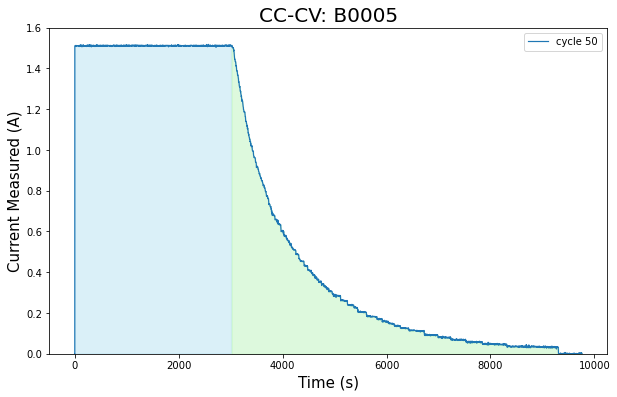

In [63]:
# Plot of a single cycle 

fig, ax = plt.subplots()

charge_cycle = 50 
file_ = charge_filename_0005_list[charge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)

ax.plot(df["Time"], df["Current_measured"], linewidth = 1.2, label  = "cycle " + str(charge_cycle) )

df_subset = df.loc[df['Voltage_measured'] <= 4.2]
ax.fill_between(df_subset["Time"], df_subset["Current_measured"], color = 'skyblue', alpha = 0.3)

df_subset_2 = df.loc[df['Voltage_measured'] > 4.2]
ax.fill_between(df_subset_2["Time"], df_subset_2["Current_measured"], color = 'lightgreen', alpha = 0.3)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')


ax.set_ylim(0, 1.6)
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_singlecycles_0005_CC_CV.png", bbox_inches='tight', dpi=500)


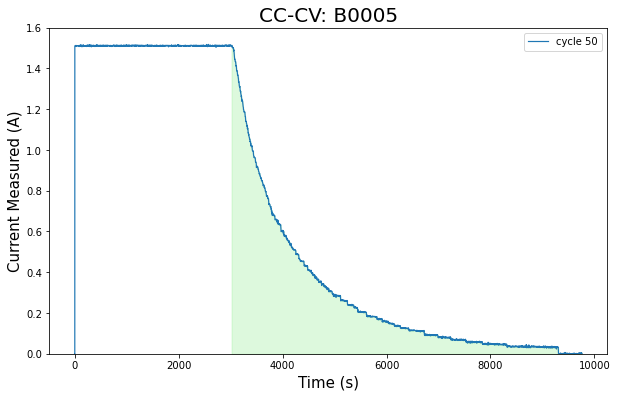

In [8]:
# Plot of a single cycle 

fig, ax = plt.subplots()

charge_cycle = 50 
file_ = charge_filename_0005_list[charge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)
ax.plot(df["Time"], df["Current_measured"], linewidth = 1.2, label  = "cycle " + str(charge_cycle) )

df_subset = df.loc[df['Voltage_measured'] > 4.2]
ax.fill_between(df_subset["Time"], df_subset["Current_measured"], color = 'lightgreen', alpha = 0.3)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')


ax.set_ylim(0, 1.6)
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_singlecycles_0005_CV.png", bbox_inches='tight', dpi=500)


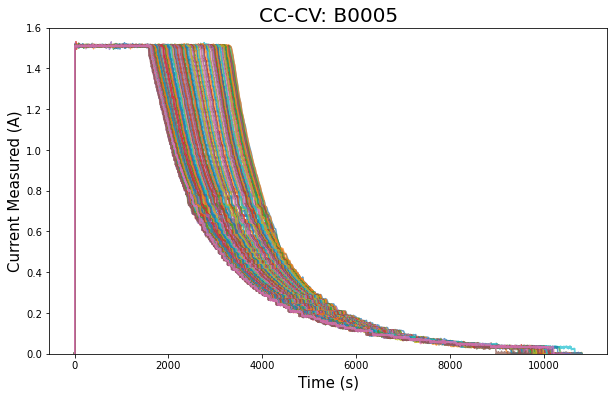

In [9]:
# Time-Current

fig1, ax = plt.subplots()

for filename in charge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')
ax.set_ylim(0, 1.6)
#ax.set_xlim(8000, 11000)

fig1.set_size_inches([10, 6])

plt.show() 

fig1.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_allcicles_0005.png", bbox_inches='tight', dpi=300)

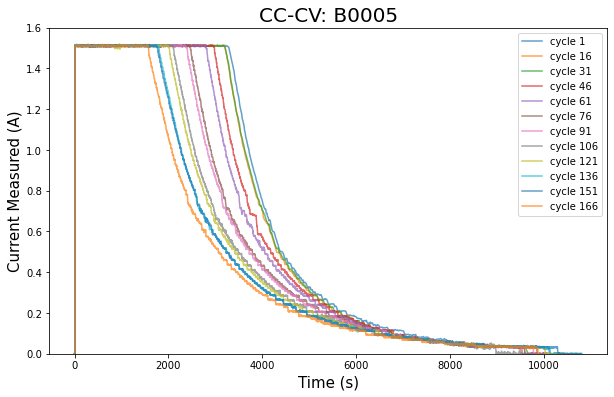

In [10]:
fig, ax = plt.subplots()

data_test_less_cycles = charge_filename_0005_list[::15]

for filename in data_test_less_cycles: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7, label = "cycle " + str(charge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')
ax.set_ylim(0, 1.6)
#ax.set_xlim(8000, 11000)
ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_somecycles_0005.png", bbox_inches='tight', dpi=500)

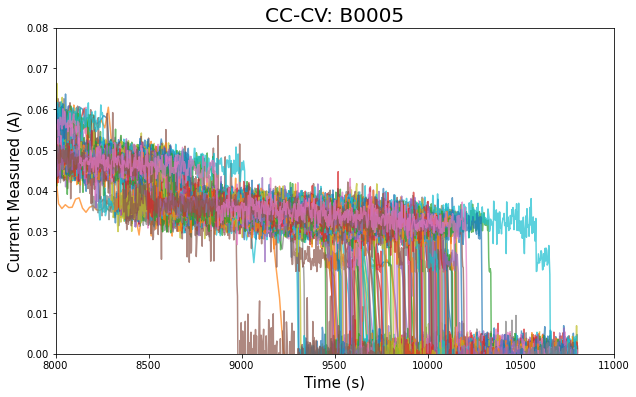

In [11]:
fig, ax = plt.subplots()

for filename in charge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')
ax.set_ylim(0, 0.08)
ax.set_xlim(8000, 11000)

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_allcicles_0005_zoom.png", bbox_inches='tight', dpi=300)

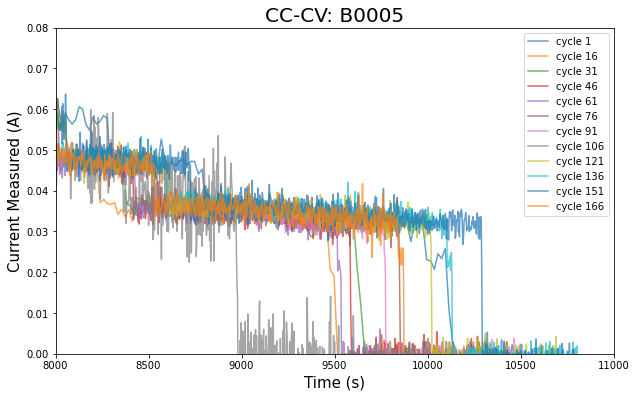

In [12]:
fig, ax = plt.subplots()

data_test_less_cycles = charge_filename_0005_list[::15]

for filename in data_test_less_cycles: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7, label = "cycle " + str(charge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0005')
ax.set_ylim(0, 0.08)
ax.set_xlim(8000, 11000)

ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_current_somecycles_0005_zoom.png", bbox_inches='tight', dpi=500)

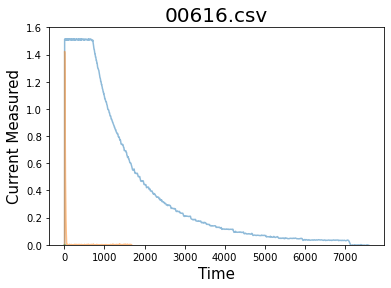

In [13]:
# Weird tests

for filename in detele_test_charge: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    plt.plot(df["Time"], df["Current_measured"], alpha = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Current Measured')
    plt.title(filename)
    plt.ylim(0, 1.6)
    
plt.show()

### Time - Voltage

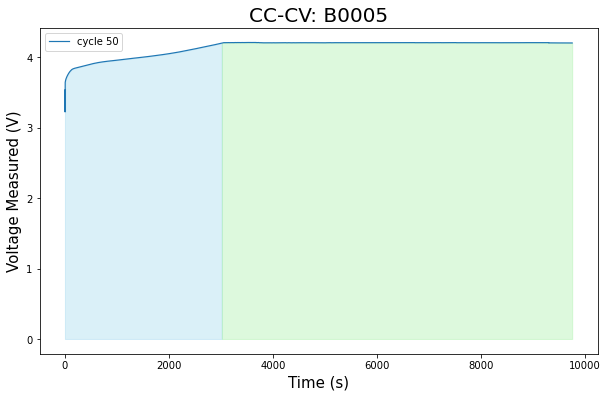

In [64]:
fig, ax = plt.subplots()

charge_cycle = 50 
file_ = charge_filename_0005_list[charge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)
ax.plot(df["Time"], df["Voltage_measured"], linewidth = 1.2, label  = "cycle " + str(charge_cycle) )

df_subset = df.loc[df['Voltage_measured'] <= 4.2]
ax.fill_between(df_subset["Time"], df_subset["Voltage_measured"], color = 'skyblue', alpha = 0.3)

df_subset_2 = df.loc[df['Voltage_measured'] > 4.2]
ax.fill_between(df_subset_2["Time"], df_subset_2["Voltage_measured"], color = 'lightgreen', alpha = 0.3)


ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots + "/" + battery_name[0] + "/" + "charge_time_voltage_singlecycles_0005_CC_CV.png", bbox_inches='tight', dpi=500)

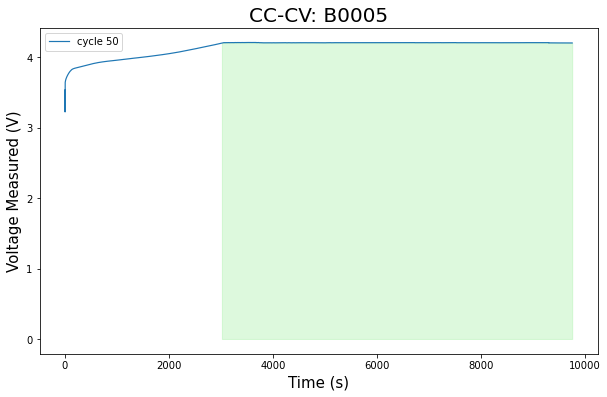

In [15]:
fig, ax = plt.subplots()

charge_cycle = 50 
file_ = charge_filename_0005_list[charge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)
ax.plot(df["Time"], df["Voltage_measured"], linewidth = 1.2, label  = "cycle " + str(charge_cycle) )

df_subset = df.loc[df['Voltage_measured'] > 4.2]
ax.fill_between(df_subset["Time"], df_subset["Voltage_measured"], color = 'lightgreen', alpha = 0.3)


ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots + "/" + battery_name[0] + "/" + "charge_time_voltage_singlecycles_0005_CV.png", bbox_inches='tight', dpi=500)

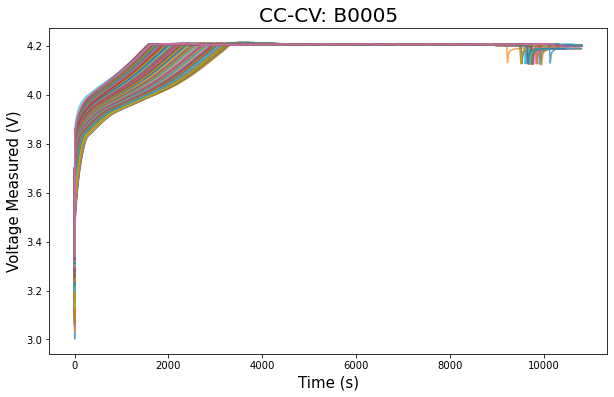

In [16]:
# Time-Voltage

fig2, ax = plt.subplots()

for filename in charge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')
fig2.set_size_inches([10, 6])
# ax.set_ylim(4.1,4.22)
# ax.set_xlim(8500,11000)

plt.show()

fig2.savefig(ruta_plots + "/" + battery_name[0] + "/" + "charge_time_voltage_allcicles_0005.png", bbox_inches='tight', dpi=300)

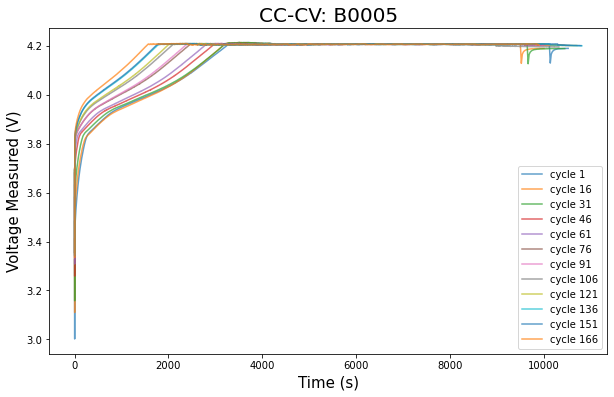

In [65]:
fig, ax = plt.subplots()

data_test_less_cycles = charge_filename_0005_list[::15]

for filename in data_test_less_cycles: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7, label = "cycle " + str(charge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')

ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_voltage_somecycles_0005.png", bbox_inches='tight', dpi=500)

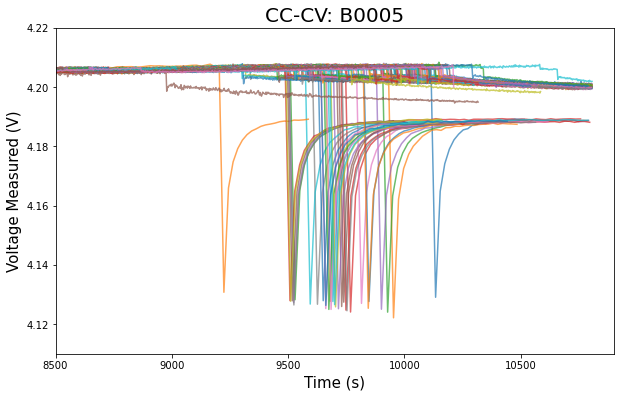

In [18]:
# Time-Voltage

fig, ax = plt.subplots()

for filename in charge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')
fig.set_size_inches([10, 6])
ax.set_ylim(4.11,4.22)
ax.set_xlim(8500,10900)

plt.show()

fig.savefig(ruta_plots + "/" + battery_name[0] + "/" + "charge_time_voltage_allcicles_0005_zoom.png", bbox_inches='tight', dpi=300)

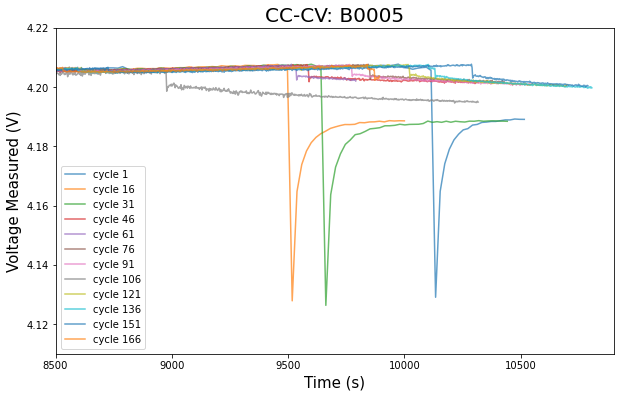

In [66]:
fig, ax = plt.subplots()

data_test_less_cycles = charge_filename_0005_list[::15]

for filename in data_test_less_cycles: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7, label = "cycle " + str(charge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0005')
ax.set_ylim(4.11,4.22)
ax.set_xlim(8500,10900)
ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "charge_time_voltage_somecycles_0005_zoom.png", bbox_inches='tight', dpi=500)

## Discharging Process

In [6]:
#discharge test data
df_discharge_B0005_metadata = metadata_df[(metadata_df["type"]== charge_type[1]) & (metadata_df["battery_id"]==battery_name[0])]

discharge_filename_0005_list = df_discharge_B0005_metadata["filename"].to_list()

print(discharge_filename_0005_list)


['00002.csv', '00004.csv', '00006.csv', '00008.csv', '00010.csv', '00012.csv', '00014.csv', '00016.csv', '00018.csv', '00020.csv', '00022.csv', '00025.csv', '00027.csv', '00029.csv', '00031.csv', '00033.csv', '00035.csv', '00037.csv', '00039.csv', '00042.csv', '00046.csv', '00050.csv', '00054.csv', '00058.csv', '00062.csv', '00066.csv', '00070.csv', '00074.csv', '00078.csv', '00082.csv', '00086.csv', '00090.csv', '00094.csv', '00098.csv', '00102.csv', '00106.csv', '00110.csv', '00114.csv', '00118.csv', '00122.csv', '00126.csv', '00130.csv', '00134.csv', '00136.csv', '00140.csv', '00144.csv', '00148.csv', '00150.csv', '00154.csv', '00158.csv', '00162.csv', '00166.csv', '00170.csv', '00174.csv', '00178.csv', '00182.csv', '00186.csv', '00190.csv', '00194.csv', '00198.csv', '00202.csv', '00206.csv', '00210.csv', '00214.csv', '00216.csv', '00220.csv', '00224.csv', '00228.csv', '00232.csv', '00236.csv', '00240.csv', '00244.csv', '00248.csv', '00252.csv', '00256.csv', '00260.csv', '00264.csv'

### Time - Current

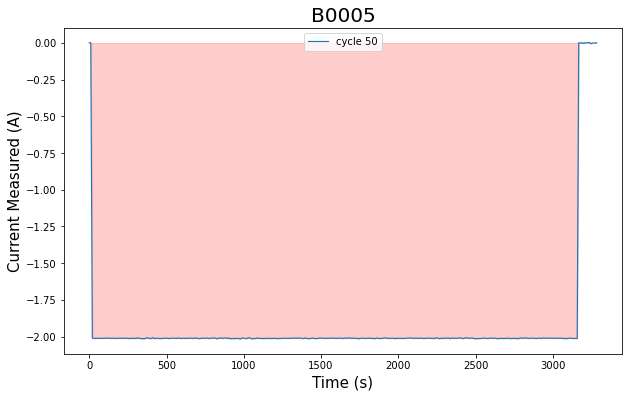

In [7]:
fig, ax = plt.subplots()

discharge_cycle = 50 
file_ = discharge_filename_0005_list[discharge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)
ax.plot(df["Time"], df["Current_measured"], linewidth = 1.2, label  = "cycle " + str(discharge_cycle) )

df_subset = df.loc[df['Voltage_measured'] <= 4.2]
ax.fill_between(df_subset["Time"], df_subset["Current_measured"], color = 'red', alpha = 0.2)


ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('B0005')
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots + "/" + battery_name[0] + "/" + "discharge_time_current_singlecycles_0005_CC.png", bbox_inches='tight', dpi=500)

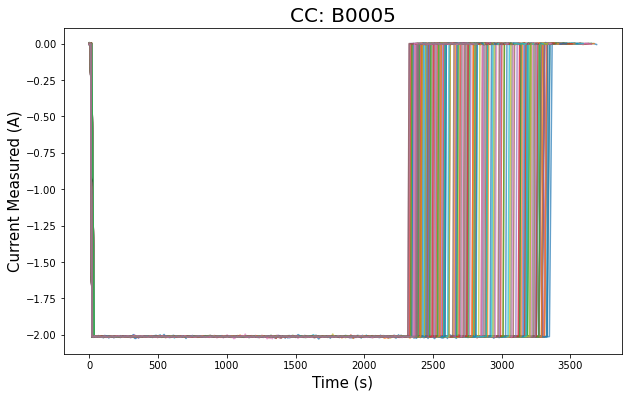

In [22]:
# Time-Current

fig3, ax = plt.subplots()

for filename in discharge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC: B0005')
fig3.set_size_inches([10, 6])

plt.show() 

fig3.savefig(ruta_plots + "/" + battery_name[0] + "/" + "discharge_time_current_allcicles_0005.png", bbox_inches='tight', dpi=300)

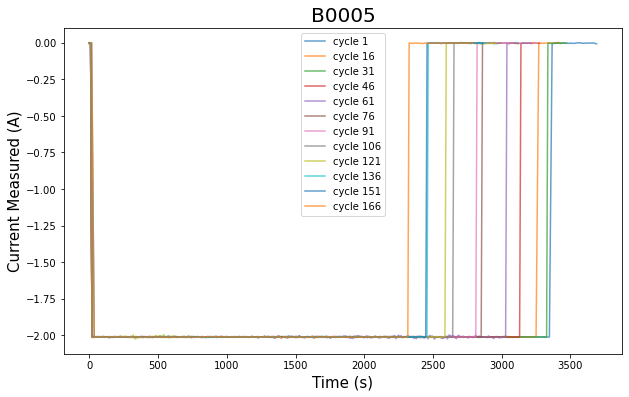

In [23]:
fig, ax = plt.subplots()

data_test_less_cycles_dis = discharge_filename_0005_list[::15]

for filename in data_test_less_cycles_dis: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7, label = "cycle " + str(discharge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('B0005')
ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "discharge_time_current_somecycles_0005.png", bbox_inches='tight', dpi=500)

### Time - Voltage

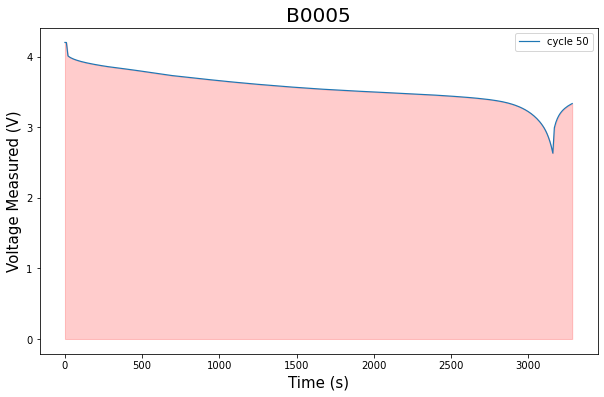

In [69]:
fig, ax = plt.subplots()

discharge_cycle = 50 
file_ = discharge_filename_0005_list[discharge_cycle]
df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + file_)
ax.plot(df["Time"], df["Voltage_measured"], linewidth = 1.2, label  = "cycle " + str(discharge_cycle) )

df_subset = df.loc[df['Voltage_measured'] <= 4.2]
ax.fill_between(df_subset["Time"], df_subset["Voltage_measured"], color = 'red', alpha = 0.2)


ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('B0005')
fig.set_size_inches([10, 6])
ax.legend()

plt.show()

fig.savefig(ruta_plots + "/" + battery_name[0] + "/" + "discharge_time_voltage_singlecycles_0005_CV.png", bbox_inches='tight', dpi=500)

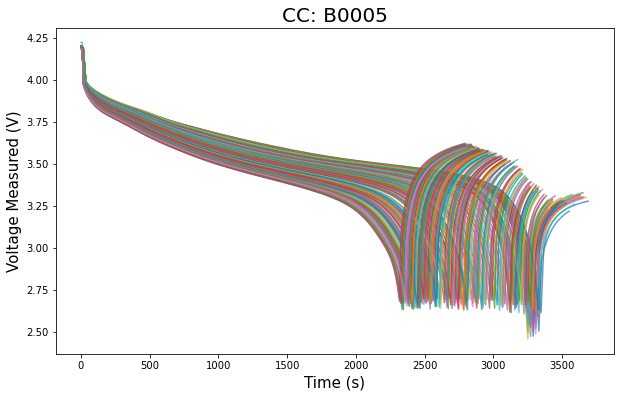

In [25]:
# Time-Voltage

fig4, ax = plt.subplots()

for filename in discharge_filename_0005_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC: B0005')
fig4.set_size_inches([10, 6])

plt.show()

fig4.savefig(ruta_plots +  "/" + battery_name[0] + "/" + "discharge_time_voltage_allcicles_0005.png", bbox_inches='tight', dpi=300)

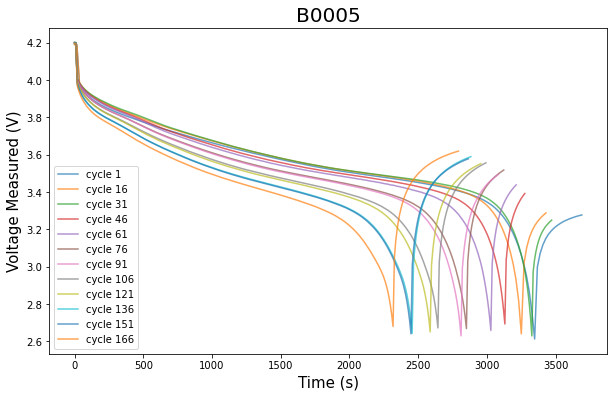

In [67]:
fig, ax = plt.subplots()

data_test_less_cycles_dis = discharge_filename_0005_list[::15]

for filename in data_test_less_cycles_dis: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[0] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7, label = "cycle " + str(discharge_filename_0005_list.index(filename)+1))
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('B0005')
ax.legend()

fig.set_size_inches([10, 6])

plt.show() 

fig.savefig(ruta_plots +  "/" + battery_name[0] + "/"  + "discharge_time_voltage_somecycles_0005.png", bbox_inches='tight', dpi=500)

### Capacity

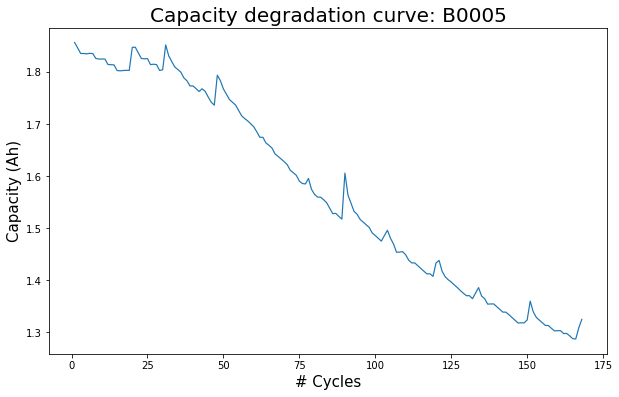

In [27]:
cycles = list(range(1,len(discharge_filename_0005_list)+1))

capacity_0005 = df_discharge_B0005_metadata["Capacity"]

fig5, ax = plt.subplots()

ax.plot(cycles, capacity_0005, linewidth = 1.2)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity (Ah)')
ax.set_title('Capacity degradation curve: B0005')
fig5.set_size_inches([10, 6])

plt.show()

fig5.savefig(ruta_plots + "/" + battery_name[0] + "/"  + "capacity_deg_0005", bbox_inches='tight', dpi=600)


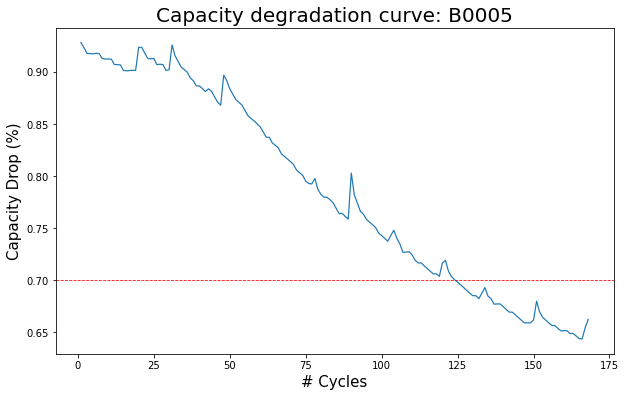

In [28]:
nominal_capacity = 2 # Ah

capacityDrop_0005 = df_discharge_B0005_metadata["Capacity"]/nominal_capacity
x = lambda a : 0.7

fig6, ax = plt.subplots()

ax.plot(cycles, capacityDrop_0005, linewidth=1.2)
ax.axhline(y=0.7, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity Drop (%)')
ax.set_title('Capacity degradation curve: B0005')
fig6.set_size_inches([10, 6])

plt.show()

fig6.savefig(ruta_plots + "/" + battery_name[0] + "/"  + "capacityDrop_deg_0005", bbox_inches='tight', dpi=600)

# B0006

## Charging process

In [29]:
#charge test data
df_charge_B0006_metadata = metadata_df[(metadata_df["type"]== charge_type[0]) & (metadata_df["battery_id"]==battery_name[1])]

charge_filename_0006_list = df_charge_B0006_metadata["filename"].to_list()

detele_test_charge_2 = ["00617.csv", "00701.csv", "01232.csv"]

for x in detele_test_charge_2: 
    charge_filename_0006_list.remove(x)

print(charge_filename_0006_list)

['00619.csv', '00621.csv', '00623.csv', '00625.csv', '00627.csv', '00629.csv', '00631.csv', '00633.csv', '00635.csv', '00637.csv', '00639.csv', '00640.csv', '00642.csv', '00644.csv', '00646.csv', '00648.csv', '00650.csv', '00652.csv', '00654.csv', '00656.csv', '00660.csv', '00664.csv', '00668.csv', '00672.csv', '00676.csv', '00680.csv', '00684.csv', '00688.csv', '00692.csv', '00696.csv', '00700.csv', '00704.csv', '00708.csv', '00712.csv', '00716.csv', '00720.csv', '00724.csv', '00728.csv', '00732.csv', '00736.csv', '00740.csv', '00744.csv', '00748.csv', '00751.csv', '00754.csv', '00758.csv', '00762.csv', '00765.csv', '00768.csv', '00772.csv', '00776.csv', '00780.csv', '00784.csv', '00788.csv', '00792.csv', '00796.csv', '00800.csv', '00804.csv', '00808.csv', '00812.csv', '00816.csv', '00820.csv', '00824.csv', '00828.csv', '00831.csv', '00834.csv', '00838.csv', '00842.csv', '00846.csv', '00850.csv', '00854.csv', '00858.csv', '00862.csv', '00866.csv', '00870.csv', '00874.csv', '00878.csv'

### Time - Current

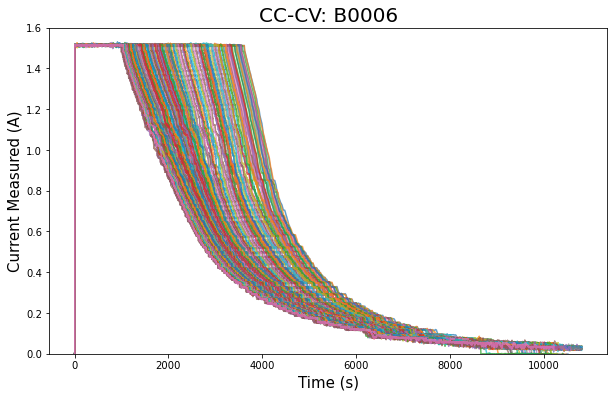

In [30]:
# Time-Current

fig7, ax = plt.subplots()

for filename in charge_filename_0006_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[1] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0006')
ax.set_ylim(0, 1.6)
fig7.set_size_inches([10, 6])

plt.show() 

fig7.savefig(ruta_plots + "/" + battery_name[1] + "/" + "charge_time_current_allcicles_0006.png", bbox_inches='tight', dpi=300)

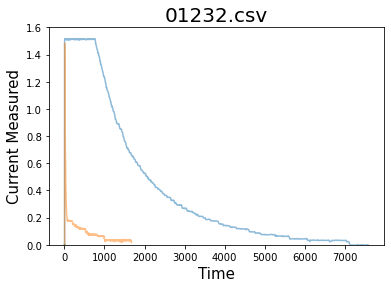

In [31]:
# Weird tests

for filename in detele_test_charge_2: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[1] + "/" + filename)
    
    plt.plot(df["Time"], df["Current_measured"], alpha = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Current Measured')
    plt.title(filename)
    plt.ylim(0, 1.6)
    
plt.show()

### Time - Voltage

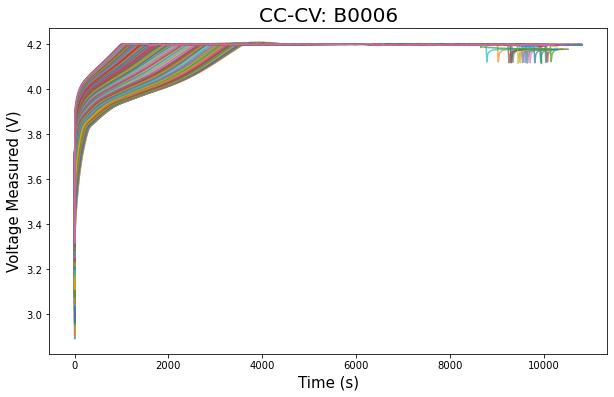

In [32]:
# Time-Voltage

fig8, ax = plt.subplots()

for filename in charge_filename_0006_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[1] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0006')
fig8.set_size_inches([10, 6])

plt.show()

fig8.savefig(ruta_plots + "/" + battery_name[1] + "/" + "charge_time_voltage_allcicles_0006.png", bbox_inches='tight', dpi=300)

## Discharging process

In [33]:
#charge test data
df_discharge_B0006_metadata = metadata_df[(metadata_df["type"]== charge_type[1]) & (metadata_df["battery_id"]==battery_name[1])]

discharge_filename_0006_list = df_discharge_B0006_metadata["filename"].to_list()

print(discharge_filename_0006_list)

['00618.csv', '00620.csv', '00622.csv', '00624.csv', '00626.csv', '00628.csv', '00630.csv', '00632.csv', '00634.csv', '00636.csv', '00638.csv', '00641.csv', '00643.csv', '00645.csv', '00647.csv', '00649.csv', '00651.csv', '00653.csv', '00655.csv', '00658.csv', '00662.csv', '00666.csv', '00670.csv', '00674.csv', '00678.csv', '00682.csv', '00686.csv', '00690.csv', '00694.csv', '00698.csv', '00702.csv', '00706.csv', '00710.csv', '00714.csv', '00718.csv', '00722.csv', '00726.csv', '00730.csv', '00734.csv', '00738.csv', '00742.csv', '00746.csv', '00750.csv', '00752.csv', '00756.csv', '00760.csv', '00764.csv', '00766.csv', '00770.csv', '00774.csv', '00778.csv', '00782.csv', '00786.csv', '00790.csv', '00794.csv', '00798.csv', '00802.csv', '00806.csv', '00810.csv', '00814.csv', '00818.csv', '00822.csv', '00826.csv', '00830.csv', '00832.csv', '00836.csv', '00840.csv', '00844.csv', '00848.csv', '00852.csv', '00856.csv', '00860.csv', '00864.csv', '00868.csv', '00872.csv', '00876.csv', '00880.csv'

### Time - Current

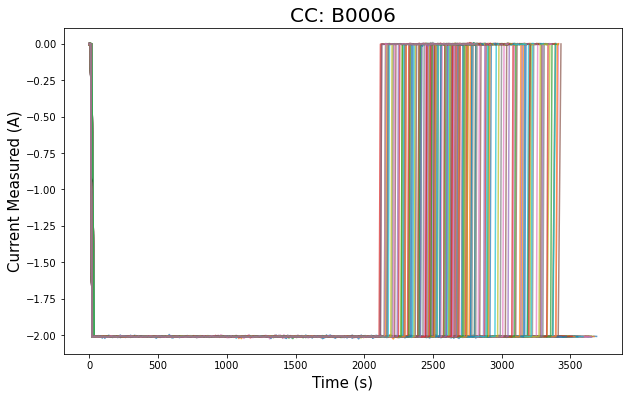

In [34]:
# Time-Current

fig9, ax = plt.subplots()

for filename in discharge_filename_0006_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[1] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC: B0006')
#ax.set_ylim(0, 1.6)
fig9.set_size_inches([10, 6])

plt.show() 

fig9.savefig(ruta_plots + "/" + battery_name[1] + "/" + "discharge_time_current_allcicles_0006.png",bbox_inches='tight', dpi=300)

### Time - Voltage

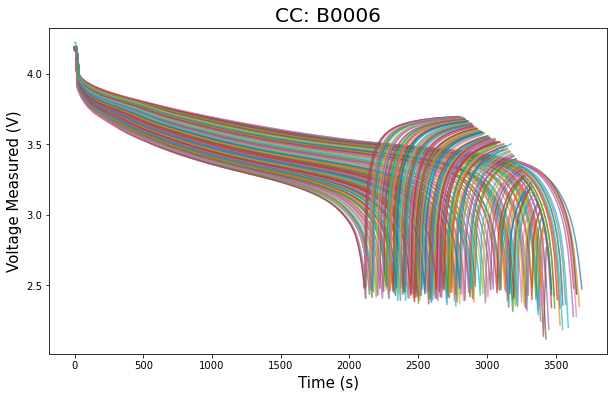

In [35]:
# Time-Voltage

fig10, ax = plt.subplots()

for filename in discharge_filename_0006_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[1] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC: B0006')
fig10.set_size_inches([10, 6])

plt.show()

fig10.savefig(ruta_plots +  "/" + battery_name[1] + "/"  + "discharge_time_voltage_allcicles_0006.png", bbox_inches='tight', dpi=300)

### Capacity

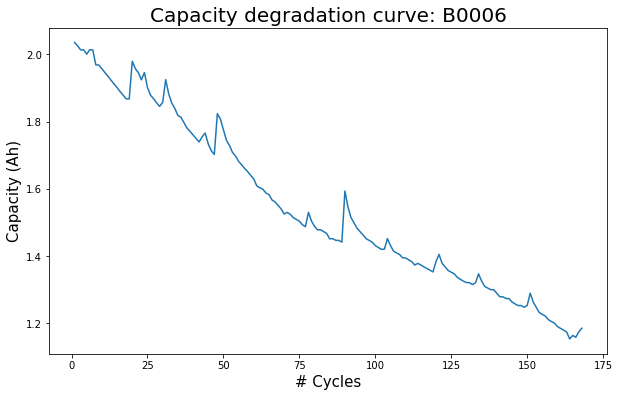

In [36]:
cycles_2 = list(range(1,len(discharge_filename_0006_list) + 1))

capacity_0006 = df_discharge_B0006_metadata["Capacity"]

fig11, ax = plt.subplots()

ax.plot(cycles_2, capacity_0006)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity (Ah)')
ax.set_title('Capacity degradation curve: B0006')
fig11.set_size_inches([10, 6])

plt.show()

fig11.savefig(ruta_plots + "/" + battery_name[1] + "/"  + "capacity_deg_0006", bbox_inches='tight', dpi=600)

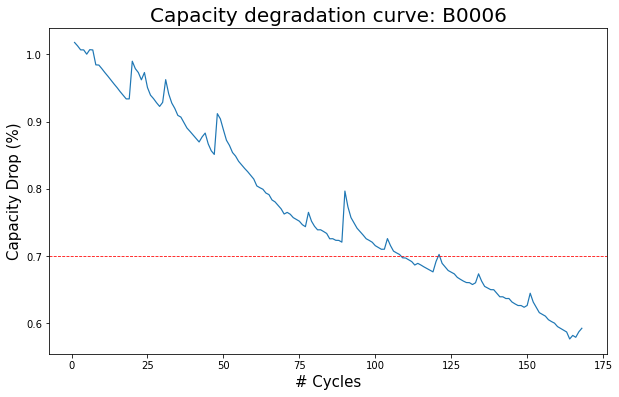

In [37]:
nominal_capacity = 2 # Ah

capacityDrop_0006 = df_discharge_B0006_metadata["Capacity"]/nominal_capacity
x = lambda a : 0.7

fig12, ax = plt.subplots()

ax.plot(cycles, capacityDrop_0006, linewidth=1.2)
ax.axhline(y=0.7, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity Drop (%)')
ax.set_title('Capacity degradation curve: B0006')
fig12.set_size_inches([10, 6])

plt.show()

fig12.savefig(ruta_plots + "/" + battery_name[1] + "/"  + "capacityDrop_deg_0006", bbox_inches='tight', dpi=600)

# B0007

## Charging process

In [38]:
#charge test data
df_charge_B0007_metadata = metadata_df[(metadata_df["type"]== charge_type[0]) & (metadata_df["battery_id"]==battery_name[2])]

charge_filename_0007_list = df_charge_B0007_metadata["filename"].to_list()

detele_test_charge_3 = ["01233.csv", "01317.csv", "01848.csv"]

for x in detele_test_charge_3: 
    charge_filename_0007_list.remove(x)

print(charge_filename_0007_list)

['01235.csv', '01237.csv', '01239.csv', '01241.csv', '01243.csv', '01245.csv', '01247.csv', '01249.csv', '01251.csv', '01253.csv', '01255.csv', '01256.csv', '01258.csv', '01260.csv', '01262.csv', '01264.csv', '01266.csv', '01268.csv', '01270.csv', '01272.csv', '01276.csv', '01280.csv', '01284.csv', '01288.csv', '01292.csv', '01296.csv', '01300.csv', '01304.csv', '01308.csv', '01312.csv', '01316.csv', '01320.csv', '01324.csv', '01328.csv', '01332.csv', '01336.csv', '01340.csv', '01344.csv', '01348.csv', '01352.csv', '01356.csv', '01360.csv', '01364.csv', '01367.csv', '01370.csv', '01374.csv', '01378.csv', '01381.csv', '01384.csv', '01388.csv', '01392.csv', '01396.csv', '01400.csv', '01404.csv', '01408.csv', '01412.csv', '01416.csv', '01420.csv', '01424.csv', '01428.csv', '01432.csv', '01436.csv', '01440.csv', '01444.csv', '01447.csv', '01450.csv', '01454.csv', '01458.csv', '01462.csv', '01466.csv', '01470.csv', '01474.csv', '01478.csv', '01482.csv', '01486.csv', '01490.csv', '01494.csv'

### Time - current

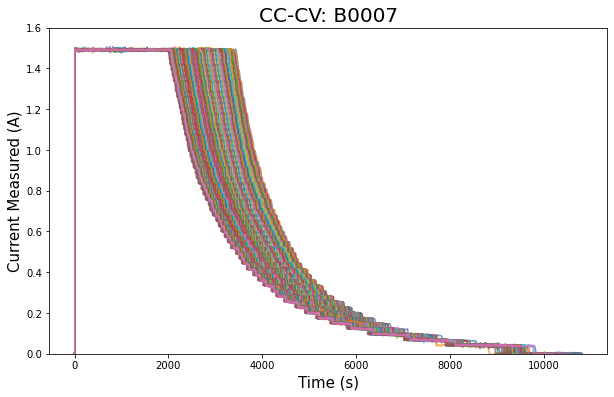

In [39]:
# Time-Current

fig13, ax = plt.subplots()

for filename in charge_filename_0007_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[2] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC-CV: B0007')
ax.set_ylim(0, 1.6)
fig13.set_size_inches([10, 6])

plt.show() 

fig13.savefig(ruta_plots + "/" + battery_name[2] + "/" + "charge_time_current_allcicles_0007.png", bbox_inches='tight', dpi=300)

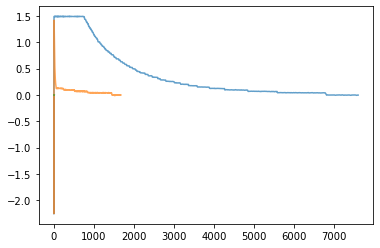

In [40]:
# Time-Current

for filename in detele_test_charge_3: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[2] + "/" + filename)
    
    plt.plot(df["Time"], df["Current_measured"], alpha = 0.7)

plt.show() 


### Time - Voltage

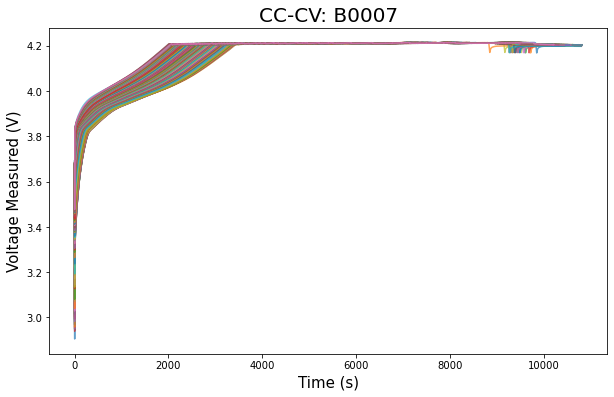

In [41]:
# Time-Voltage

fig14, ax = plt.subplots()

for filename in charge_filename_0007_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[2] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC-CV: B0007')
fig14.set_size_inches([10, 6])

plt.show()

fig14.savefig(ruta_plots + "/" + battery_name[2] + "/" + "charge_time_voltage_allcicles_0007.png", bbox_inches='tight', dpi=300)

## Discharging process

In [42]:
#charge test data
df_discharge_B0007_metadata = metadata_df[(metadata_df["type"]== charge_type[1]) & (metadata_df["battery_id"]==battery_name[2])]

discharge_filename_0007_list = df_discharge_B0007_metadata["filename"].to_list()

print(discharge_filename_0007_list)

['01234.csv', '01236.csv', '01238.csv', '01240.csv', '01242.csv', '01244.csv', '01246.csv', '01248.csv', '01250.csv', '01252.csv', '01254.csv', '01257.csv', '01259.csv', '01261.csv', '01263.csv', '01265.csv', '01267.csv', '01269.csv', '01271.csv', '01274.csv', '01278.csv', '01282.csv', '01286.csv', '01290.csv', '01294.csv', '01298.csv', '01302.csv', '01306.csv', '01310.csv', '01314.csv', '01318.csv', '01322.csv', '01326.csv', '01330.csv', '01334.csv', '01338.csv', '01342.csv', '01346.csv', '01350.csv', '01354.csv', '01358.csv', '01362.csv', '01366.csv', '01368.csv', '01372.csv', '01376.csv', '01380.csv', '01382.csv', '01386.csv', '01390.csv', '01394.csv', '01398.csv', '01402.csv', '01406.csv', '01410.csv', '01414.csv', '01418.csv', '01422.csv', '01426.csv', '01430.csv', '01434.csv', '01438.csv', '01442.csv', '01446.csv', '01448.csv', '01452.csv', '01456.csv', '01460.csv', '01464.csv', '01468.csv', '01472.csv', '01476.csv', '01480.csv', '01484.csv', '01488.csv', '01492.csv', '01496.csv'

### Time - Current

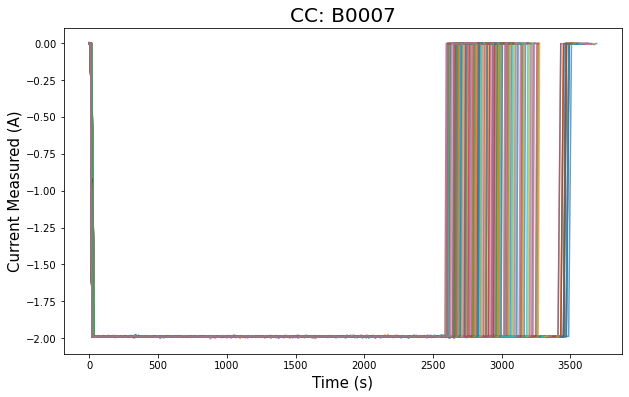

In [43]:
# Time-Current

fig15, ax = plt.subplots()

for filename in discharge_filename_0007_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[2] + "/" + filename)
    
    ax.plot(df["Time"], df["Current_measured"], alpha = 0.7)
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current Measured (A)')
ax.set_title('CC: B0007')
#ax.set_ylim(0, 1.6)
fig15.set_size_inches([10, 6])

plt.show() 

fig15.savefig(ruta_plots + "/" + battery_name[2] + "/" + "discharge_time_current_allcicles_0007.png", bbox_inches='tight',dpi=300)

### Time - Voltage

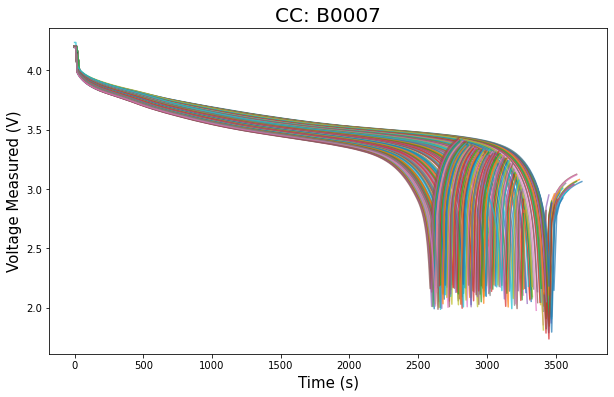

In [44]:
# Time-Voltage

fig16, ax = plt.subplots()

for filename in discharge_filename_0007_list: 

    df = pd.read_csv(csv_folder_path + "/" + battery_name[2] + "/" + filename)
    
    ax.plot(df["Time"], df["Voltage_measured"], alpha = 0.7)
    
     
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('CC: B0007')
fig16.set_size_inches([10, 6])

plt.show()

fig16.savefig(ruta_plots +  "/" + battery_name[2] + "/"  + "discharge_time_voltage_allcicles_0007.png", bbox_inches='tight', dpi=300)

### Capacity

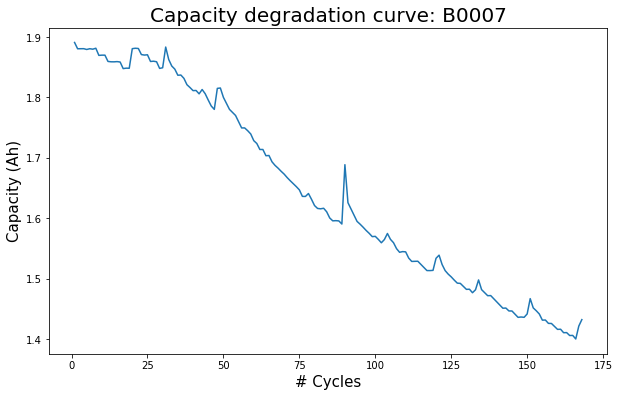

In [45]:
cycles_3 = list(range(1,len(discharge_filename_0007_list)+1))

capacity_0007 = df_discharge_B0007_metadata["Capacity"]

fig17, ax = plt.subplots()

ax.plot(cycles_3, capacity_0007)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity (Ah)')
ax.set_title('Capacity degradation curve: B0007')
fig17.set_size_inches([10, 6])

plt.show()

fig17.savefig(ruta_plots + "/" + battery_name[2] + "/"  + "capacity_deg_0007", bbox_inches='tight', dpi=500)

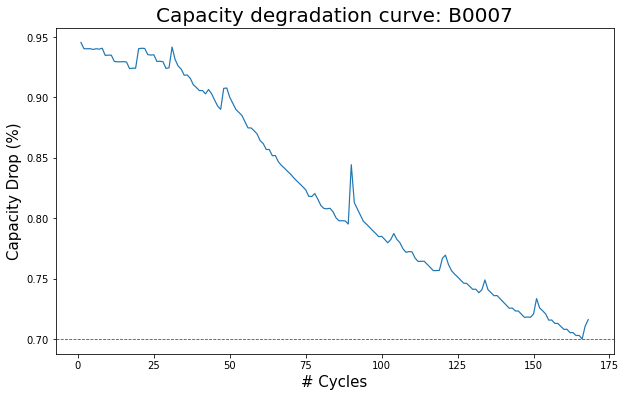

In [46]:
nominal_capacity = 2 # Ah

capacityDrop_0007 = df_discharge_B0007_metadata["Capacity"]/nominal_capacity
x = lambda a : 0.7

fig18, ax = plt.subplots()

ax.plot(cycles, capacityDrop_0007, linewidth=1.2)
ax.axhline(y=0.7, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity Drop (%)')
ax.set_title('Capacity degradation curve: B0007')
fig18.set_size_inches([10, 6])

plt.show()

fig18.savefig(ruta_plots + "/" + battery_name[2] + "/"  + "capacityDrop_deg_0007", bbox_inches='tight', dpi=500)

# Capacity degradation curves

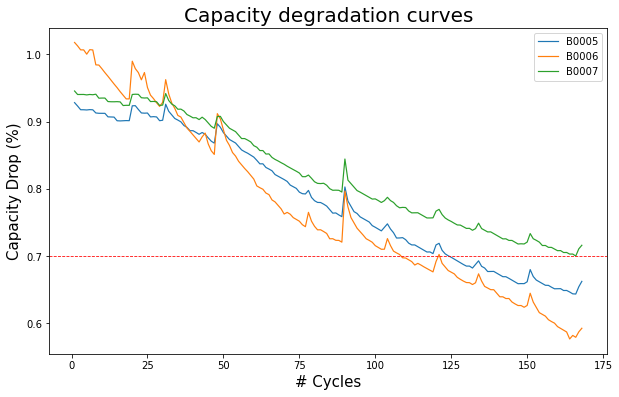

In [47]:
# Capacity Drop

fig19, ax = plt.subplots()

ax.plot(cycles, capacityDrop_0005, linewidth=1.2, label = "B0005")
ax.plot(cycles, capacityDrop_0006, linewidth=1.2, label = "B0006")
ax.plot(cycles, capacityDrop_0007, linewidth=1.2, label = "B0007")
ax.axhline(y=0.7, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel('# Cycles')
ax.set_ylabel('Capacity Drop (%)')
ax.set_title('Capacity degradation curves')
ax.legend()
fig19.set_size_inches([10, 6])

plt.show()

fig19.savefig(ruta_plots + "/" + "capacityDrop_curves", bbox_inches='tight', dpi=700)

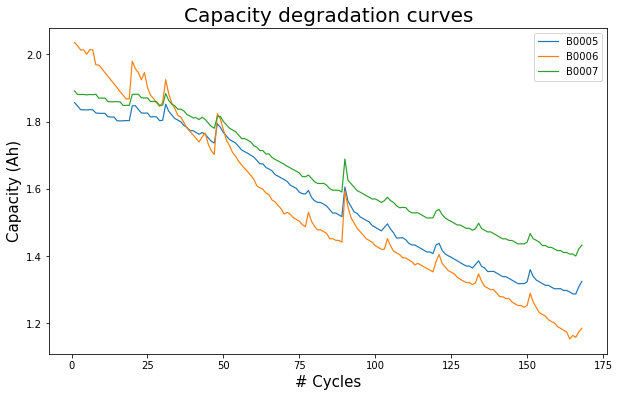

In [48]:
# Capacity 

fig20, ax = plt.subplots()

ax.plot(cycles, capacity_0005, linewidth=1.2, label = "B0005")
ax.plot(cycles, capacity_0006, linewidth=1.2, label = "B0006")
ax.plot(cycles, capacity_0007, linewidth=1.2, label = "B0007")

ax.set_xlabel('# Cycles', fontsize=15)
ax.set_ylabel('Capacity (Ah)', fontsize=15)
ax.set_title('Capacity degradation curves', fontsize=20)
ax.legend()
fig20.set_size_inches([10, 6])


plt.show()

fig20.savefig(ruta_plots + "/" + "capacity_curves", bbox_inches='tight', dpi=700)

# Temperature plots

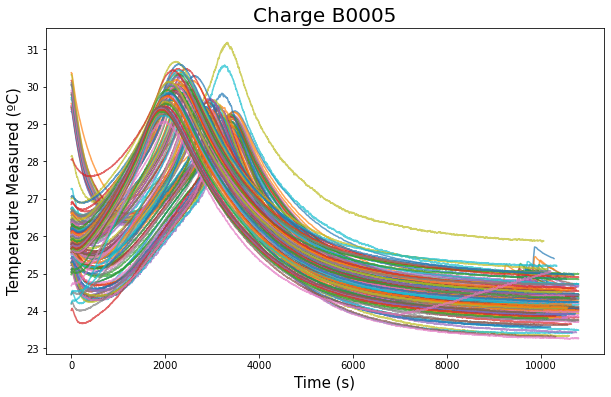

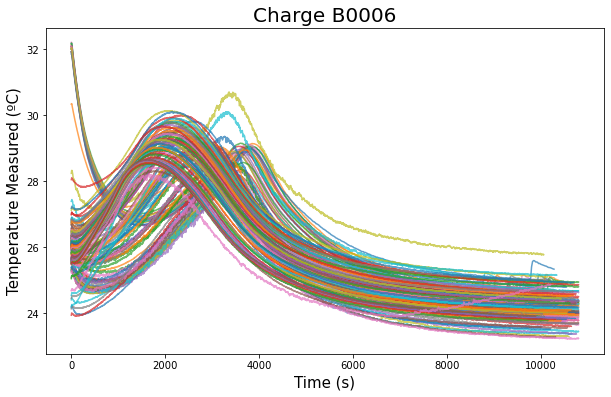

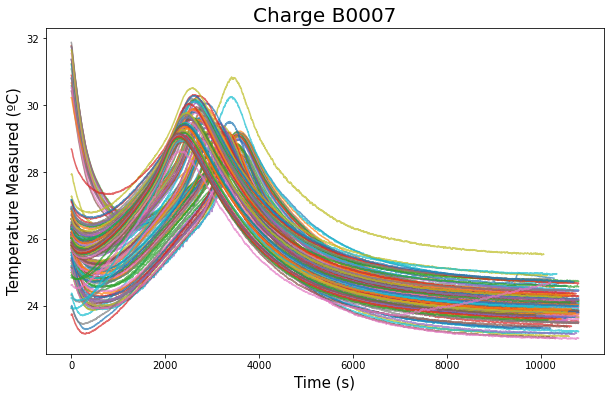

In [49]:
# Charge

def temperature_plot(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    fig, ax = plt.subplots()

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        
        ax.plot(df["Time"], df["Temperature_measured"], alpha = 0.7)
        
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Temperature Measured (ºC)')
    ax.set_title('Charge ' + battery)

    fig.set_size_inches([10, 6])

    plt.show() 

    fig.savefig(ruta_plots +  "/" + "Temperature" + "/"  + "charge_time_temperature_allcicles_" + battery + ".png", bbox_inches='tight', dpi=300)


temperature_plot(battery_name[0])
temperature_plot(battery_name[1])
temperature_plot(battery_name[2])

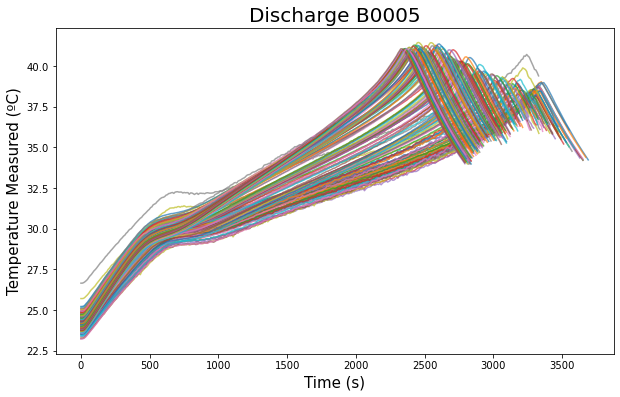

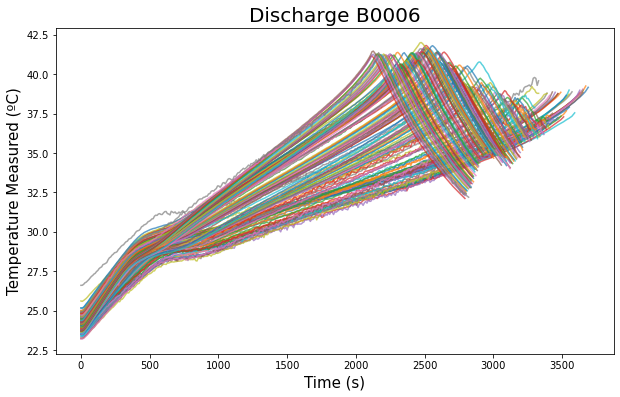

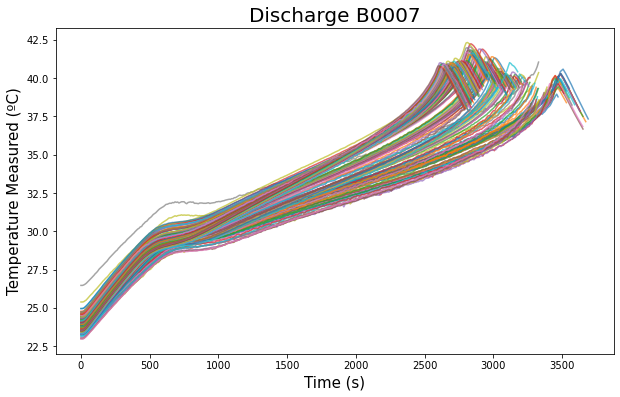

In [50]:
# Charge

def temperature_plot(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list

    fig, ax = plt.subplots()

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        
        ax.plot(df["Time"], df["Temperature_measured"], alpha = 0.7)
        
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Temperature Measured (ºC)')
    ax.set_title('Discharge ' + battery)

    fig.set_size_inches([10, 6])

    plt.show() 

    fig.savefig(ruta_plots +  "/" + "Temperature" + "/"  + "discharge_time_temperature_allcicles_" + battery + ".png", bbox_inches='tight', dpi=300)


temperature_plot(battery_name[0])
temperature_plot(battery_name[1])
temperature_plot(battery_name[2])

# HIs extraction

Article: B1, B3, B6, B21, B24, and B26

### Current related

- B1: Area covered under current curves of the CC process
- B2: Area covered under current curves of CV process
- B3: Area covered under current curves of CC-CV process
- B5: Area covered under current curves of discharge process

### Voltage related

- B6: Area covered under voltage curves of CC process
- B7: Area covered under voltage curves of CV process
- B8: Area covered under voltage curves of discharge process

### Temperature related
- B10: Maximum temperature of charge and discharge cycles
- B11: Minimum temperature of charge and discharge cycle
- B12: Average temperature of charge and discharge cycle


### Time related
- B17: Discharge time
- B18: Charging time
- B19: CC stage period
- B20: CV stage period
- B21: CC stage end time
- B22: Time to peak temperature during discharge
- B24: The time for voltages increases from 3.7 V to 4.2 V
during the CC process
- B26: Time for voltages decreases from 3.7 V to 2.7 V during
discharging




## Current related

In [51]:
# B1: Area covered under current curves of the CC process

def B1(battery): 

    if battery == "B0005": 
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list


    charge_area_current_CC = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        df_subset = df.loc[df['Voltage_measured'] <= 4.2]

        charge_area_current_CC.append(np.abs(df_subset["Current_measured"].mean()) * df_subset["Time"].max())

    charge_area_current_CC_avg = np.mean(charge_area_current_CC)/3600 # for converting into Ah

    return ("B1: " + str(round(charge_area_current_CC_avg,5)) + " Ah " + battery + " battery")


B1_list = [B1(battery_name[0]), B1(battery_name[1]), B1(battery_name[2])]

print(B1_list)

['B1: 2.15157 Ah B0005 battery', 'B1: 1.88594 Ah B0006 battery', 'B1: 1.57829 Ah B0007 battery']


In [52]:
# B2: Area covered under current curves of CV process

def B2(battery):

    if battery == "B0005": 
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    charge_area_current_CV = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        df_subset = df.loc[df['Voltage_measured'] > 4.2]

        charge_area_current_CV.append(np.trapz(np.abs(df_subset["Current_measured"]), df_subset["Time"]))

    charge_area_current_CV_avg = np.mean(charge_area_current_CV)/3600

    return ("B2: " + str(round(charge_area_current_CV_avg,5)) + " Ah " + battery + " battery")

B2_list = [B2(battery_name[0]), B2(battery_name[1]), B2(battery_name[2])]

print(B2_list)


['B2: 0.57605 Ah B0005 battery', 'B2: 0.66976 Ah B0006 battery', 'B2: 0.5592 Ah B0007 battery']


In [53]:
# B3: Area covered under current curves of CC-CV process

def B3(battery):

    if battery == "B0005": 
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    charge_area_current_CC_CV = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        charge_area_current_CC_CV.append(np.trapz(np.abs(df["Current_measured"]), df["Time"]))

    charge_area_current_CC_CV_avg = np.mean(charge_area_current_CC_CV)/3600

    return ("B3: " + str(round(charge_area_current_CC_CV_avg,5)) + " Ah " + battery + " battery")

B3_list = [B3(battery_name[0]), B3(battery_name[1]), B3(battery_name[2])]

print(B3_list)

['B3: 1.5879 Ah B0005 battery', 'B3: 1.5698 Ah B0006 battery', 'B3: 1.67019 Ah B0007 battery']


In [54]:
# B5: Area covered under current curves of discharge process

def B5(battery):

    if battery == "B0005": 
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007": 
        type = discharge_filename_0007_list

    discharge_area_current_CC = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        discharge_area_current_CC.append(np.trapz(np.abs(df["Current_measured"]), df["Time"]))

    discharge_area_current_CC_avg = np.mean(discharge_area_current_CC)/3600

    return ("B5: " + str(round(discharge_area_current_CC_avg,5)) + " Ah " + battery + " battery")


B5_list = [B5(battery_name[0]), B5(battery_name[1]), B5(battery_name[2])]

print(B5_list)

['B5: 1.57587 Ah B0005 battery', 'B5: 1.56068 Ah B0006 battery', 'B5: 1.66591 Ah B0007 battery']


## Voltage related

In [55]:
# B6: Area covered under voltage curves of CC process

def B6(battery): 

    if battery == "B0005": 
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    else: 
        type = charge_filename_0007_list

    charge_area_voltage_CC = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        df_subset = df.loc[df['Voltage_measured'] <= 4.2]

        charge_area_voltage_CC.append(np.trapz(np.abs(df_subset["Voltage_measured"]), df_subset["Time"]))

    charge_area_voltage_CC_avg = np.mean(charge_area_voltage_CC)/3600

    return ("B6: " + str(round(charge_area_voltage_CC_avg,5)) + " Vh " + battery + " battery")


B6_list = [B6(battery_name[0]), B6(battery_name[1]), B6(battery_name[2])]

print(B6_list)


['B6: 6.12568 Vh B0005 battery', 'B6: 12.12857 Vh B0006 battery', 'B6: 4.49102 Vh B0007 battery']


In [56]:
# B7: Area covered under voltage curves of CV process

def B7(battery):

    if battery == "B0005": 
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    else: 
        type = charge_filename_0007_list

    charge_area_voltage_CV = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        df_subset = df.loc[df['Voltage_measured'] > 4.2]

        charge_area_voltage_CV.append(np.trapz(np.abs(df_subset["Voltage_measured"]), df_subset["Time"]))

    charge_area_voltage_CV_avg = np.mean(charge_area_voltage_CV)/3600

    return ("B7: " + str(round(charge_area_voltage_CV_avg,5)) + " Vh " + battery + " battery")


B7_list = [B7(battery_name[0]), B7(battery_name[1]), B7(battery_name[2])]

print(B7_list)


['B7: 9.27924 Vh B0005 battery', 'B7: 6.01307 Vh B0006 battery', 'B7: 8.98148 Vh B0007 battery']


In [57]:
# B8: Area covered under voltage curves of discharge process

def B8(battery):

    if battery == "B0005": 
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007": 
        type = discharge_filename_0007_list

    discharge_area_voltage_CC = []

    for cycle in type:

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + cycle)

        discharge_area_voltage_CC.append(np.trapz(np.abs(df["Voltage_measured"]), df["Time"]))

    discharge_area_voltage_CC_avg = np.mean(discharge_area_voltage_CC)/3600

    return ("B8: " + str(round(discharge_area_voltage_CC_avg,5)) + " Vh " + battery + " battery")


B8_list = [B8(battery_name[0]), B8(battery_name[1]), B8(battery_name[2])]

print(B8_list)

['B8: 3.05697 Vh B0005 battery', 'B8: 3.01342 Vh B0006 battery', 'B8: 3.05732 Vh B0007 battery']


## Temperature related

In [58]:
# B10: Maximum temperature of charge and discharge cycles

def B10_charge(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list


    temp_max_charge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_max_charge_cycle.append(df["Temperature_measured"].max())

    max_temp_charge = max(temp_max_charge_cycle)

    return max_temp_charge


def B10_discharge(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list


    temp_max_discharge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_max_discharge_cycle.append(df["Temperature_measured"].max())

    max_temp_discharge = max(temp_max_discharge_cycle)

    return max_temp_discharge


B10_list = [max(B10_charge(battery_name[0]), B10_discharge(battery_name[0])),
            max(B10_charge(battery_name[1]), B10_discharge(battery_name[1])),
            max(B10_charge(battery_name[2]), B10_discharge(battery_name[2])),
            ]


print("B10: " + str(round(B10_list[0],5)) + "ºC " + battery_name[0] + " battery")
print("B10: " + str(round(B10_list[1],5)) + "ºC " + battery_name[1] + " battery")
print("B10: " + str(round(B10_list[2],5)) + "ºC " + battery_name[2] + " battery")


B10: 41.45023ºC B0005 battery
B10: 42.00754ºC B0006 battery
B10: 42.33252ºC B0007 battery


In [59]:
# B11: Minimum temperature of charge and discharge cycle

def B11_charge(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list


    temp_min_charge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_min_charge_cycle.append(df["Temperature_measured"].min())

    min_temp_charge = min(temp_min_charge_cycle)

    return min_temp_charge


def B11_discharge(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list


    temp_min_discharge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_min_discharge_cycle.append(df["Temperature_measured"].min())

    min_temp_discharge = min(temp_min_discharge_cycle)

    return min_temp_discharge


B11_list = [min(B11_charge(battery_name[0]), B11_discharge(battery_name[0])),
            min(B11_charge(battery_name[1]), B11_discharge(battery_name[1])),
            min(B11_charge(battery_name[2]), B11_discharge(battery_name[2])),
            ]


print("B11: " + str(round(B11_list[0]),5) + "ºC " + battery_name[0] + " battery")
print("B11: " + str(round(B11_list[1]),5) + "ºC " + battery_name[1] + " battery")
print("B11: " + str(round(B11_list[2]),5) + "ºC " + battery_name[2] + " battery")

TypeError: str() argument 2 must be str, not int

In [ ]:
# B12: Average temperature of charge and discharge cycle

def B12_charge(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list


    temp_mean_charge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_mean_charge_cycle.append(df["Temperature_measured"].mean())

    mean_temp_charge = max(temp_mean_charge_cycle)

    return mean_temp_charge


def B12_discharge(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list

    temp_mean_discharge_cycle = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        temp_mean_discharge_cycle.append(df["Temperature_measured"].mean())

    mean_temp_discharge = max(temp_mean_discharge_cycle)

    return mean_temp_discharge


B12_list = [(B12_charge(battery_name[0]) + B12_discharge(battery_name[0]))/2,
            (B12_charge(battery_name[1]) + B12_discharge(battery_name[1]))/2,
            (B12_charge(battery_name[2]) + B12_discharge(battery_name[2]))/2,
            ]


print("B12: " + str(B12_list[0]) + "ºC " + battery_name[0] + " battery")
print("B12: " + str(B12_list[1]) + "ºC " + battery_name[1] + " battery")
print("B12: " + str(B12_list[2]) + "ºC " + battery_name[2] + " battery")

B12: 30.852820796381053ºC B0005 battery
B12: 30.935486087515457ºC B0006 battery
B12: 30.456529135744347ºC B0007 battery


## Time related

In [ ]:
# B17: Discharge time

def B17(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list

    discharge_time = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        discharge_time.append(df["Time"].max())

    discharge_time_mean = np.mean(discharge_time)

    return ("B17: " + str(round(discharge_time_mean,2)) + " s " + battery)


B17_list = [B17(battery_name[0]), B17(battery_name[1]), B17(battery_name[2])]

print(B17_list)


# B20: CV stage period

# B22: Time to peak temperature during discharge

['B17: 3129.52 s B0005', 'B17: 3129.52 s B0006', 'B17: 3129.52 s B0007']


In [ ]:
# B18: Charging time

def B18(battery): 

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    charge_time = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)

        charge_time.append(df["Time"].max())

    charge_time_mean = np.mean(charge_time)

    return ("B18: " + str(round(charge_time_mean,5)) + " s " + battery)


B18_list = [B18(battery_name[0]), B18(battery_name[1]), B18(battery_name[2])]

print(B18_list)


['B18: 10481.31013 s B0005', 'B18: 10481.31013 s B0006', 'B18: 10481.31013 s B0007']


In [ ]:
# B19: CC stage period

def B19(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    CC_time = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        df_subset = df.loc[df['Voltage_measured'] <= 4.2]

        CC_time.append(df_subset["Time"].max())

    CC_time_mean = np.mean(CC_time)

    return ("B19: " + str(round(CC_time_mean,2)) + " s " + battery)


B19_list = [B19(battery_name[0]), B19(battery_name[1]), B19(battery_name[2])]

print(B19_list)

['B19: 5364.6 s B0005', 'B19: 10481.31 s B0006', 'B19: 3973.87 s B0007']


In [ ]:
# B21: CC stage end time
def B21(battery):

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list
    

    CV_time = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        df_subset = df.loc[df['Voltage_measured'] > 4.2]

        CV_time.append(df_subset["Time"].max() - df_subset["Time"].min())

    CV_time_mean = np.mean(CV_time)

    return ("B21: " + str(round(CV_time_mean,2)) + " s " + battery)

B21_list = [B21(battery_name[0]), B21(battery_name[1]), B21(battery_name[2])]

print(B21_list)


['B21: 7942.92 s B0005', 'B21: 5153.54 s B0006', 'B21: 7678.47 s B0007']


In [ ]:
# B24: The time for voltages increases from 3.7 V to 4.2 V during the CC process

def B24(battery): 

    if battery == "B0005":
        type = charge_filename_0005_list

    elif battery == "B0006":
        type = charge_filename_0006_list

    elif battery == "B0007":
        type = charge_filename_0007_list

    CC_process = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        df_subset = df.loc[(df['Voltage_measured'] >= 3.7) & (df['Voltage_measured'] <= 4.2)]

        CC_process.append(df_subset["Time"].max() - df_subset["Time"].min())

    CC_process_mean = np.mean(CC_process)

    return ("B24: " + str(round(CC_process_mean,2)) + " s " + battery)


B24_list = [B24(battery_name[0]), B24(battery_name[1]), B24(battery_name[2])]

print(B24_list)

['B24: 5341.13 s B0005', 'B24: 10460.92 s B0006', 'B24: 3932.66 s B0007']


In [ ]:
# B26: Time for voltages decreases from 3.7 V to 2.7 V during discharging

def B26(battery):

    if battery == "B0005":
        type = discharge_filename_0005_list

    elif battery == "B0006":
        type = discharge_filename_0006_list

    elif battery == "B0007":
        type = discharge_filename_0007_list

    CC_process_dis = []

    for filename in type: 

        df = pd.read_csv(csv_folder_path + "/" + battery + "/" + filename)
        df_subset = df.loc[(df['Voltage_measured'] >= 2.7) & (df['Voltage_measured'] <= 3.7)]

        CC_process_dis.append(df_subset["Time"].max() - df_subset["Time"].min())

    CC_process_dis_mean = np.mean(CC_process_dis)

    return ("B26: " + str(round(CC_process_dis_mean,2)) + " s " + battery)

B26_list = [B26(battery_name[0]), B26(battery_name[1]), B26(battery_name[2])]

print(B26_list)


['B26: 2470.59 s B0005', 'B26: 2614.87 s B0006', 'B26: 2398.64 s B0007']
